In [2]:
from ipynb.fs.full.TARGET_Analysis_Functions import *
from ipynb.fs.full.ACE2_SCA_Analysis import *

# EFS Analysis

Low IFITM2 v.s. High IFITM2: t-test independent samples, P_val=2.992e-01 stat=1.042e+00


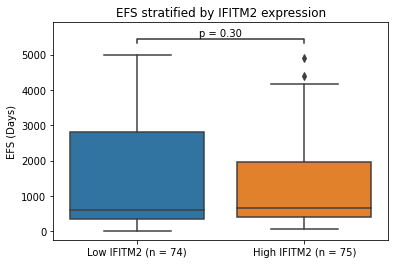

Low IFITM2: median = 613.5, mean = 1494.8108108108108, 95% CI = (1147.7564501049224, 1841.8651715166993)
High IFITM2: median = 659.0, mean = 1263.4933333333333, 95% CI = (999.7423713835033, 1527.2442952831634)


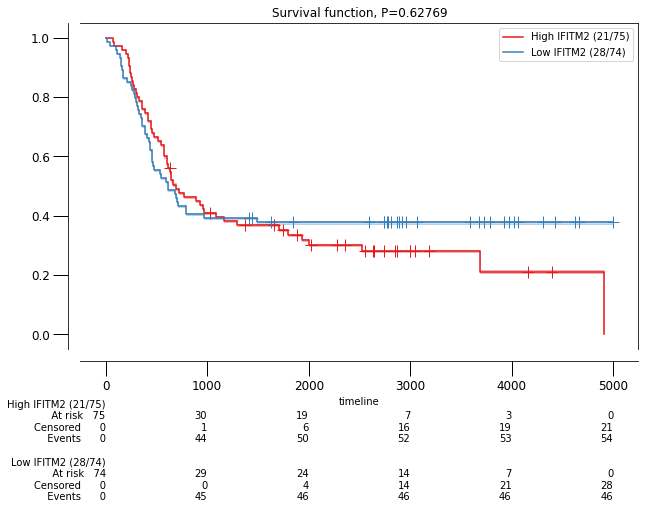

In [6]:
IFITM2_groups = stratifyDataOnGeneExpression('IFITM2',-0.5,0.5)
compareEFS2(IFITM2_groups, 'EFS stratified by IFITM2 expression', ['Low IFITM2','High IFITM2'], 't-test_ind')
kaplanmeierEFS(IFITM2_groups,'Low IFITM2','High IFITM2')



# MYCN Analysis

Not Amplified v.s. Amplified: t-test independent samples, P_val=6.999e-06 stat=4.594e+00


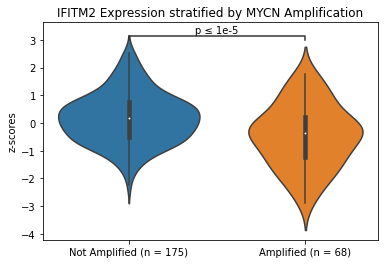

Not Amplified: median = 0.1623, mean = 0.1748297142857143, 95% CI = (0.040668149184395846, 0.30899127938703275)
Amplified: median = -0.35624999999999996, mean = -0.4632838235294118, 95% CI = (-0.7309693635795522, -0.19559828347927127)


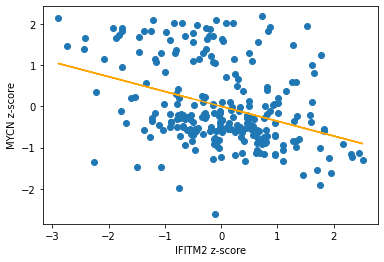

Pearson correlation coefficient = -0.35889504704961916
p-value = 5.537339499384113e-09


In [8]:
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')
compareExpression2('IFITM2', MYCN_groups,'MYCN Amplification',['Not Amplified','Amplified'],'t-test_ind')
geneScatter('IFITM2','MYCN')

# SCA Analysis

No Loss v.s. Loss: t-test independent samples, P_val=3.662e-02 stat=2.144e+00


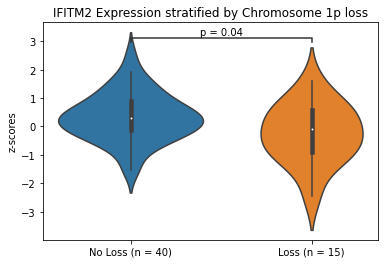

No Loss: median = 0.30874999999999997, mean = 0.3315525, 95% CI = (0.07100299271205551, 0.5921020072879446)
Loss: median = -0.1017, mean = -0.24894666666666668, 95% CI = (-0.7694376500449266, 0.2715443167115933)
No Loss v.s. Loss: t-test independent samples, P_val=9.782e-01 stat=-2.751e-02


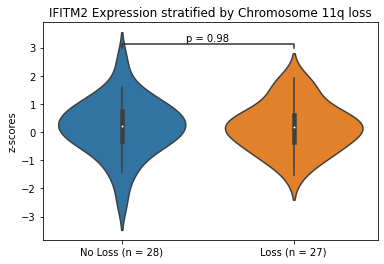

No Loss: median = 0.21085, mean = 0.1698392857142857, 95% CI = (-0.20211168324045592, 0.5417902546690273)
Loss: median = 0.1623, mean = 0.17675555555555558, 95% CI = (-0.14421606111691196, 0.4977271722280231)
No Gain v.s. Gain: t-test independent samples, P_val=4.903e-01 stat=6.946e-01


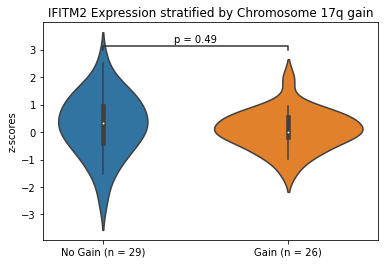

No Gain: median = 0.3268, mean = 0.2555310344827586, 95% CI = (-0.14261487981151177, 0.653676948777029)
Gain: median = 0.0006999999999999992, mean = 0.08144230769230772, 95% CI = (-0.18631423528239965, 0.34919885066701506)
No SCA v.s. SCA: t-test independent samples, P_val=1.219e-01 stat=1.572e+00


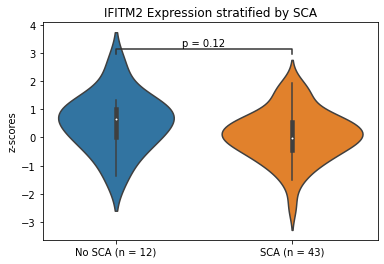

No SCA: median = 0.6594, mean = 0.5388333333333334, 95% CI = (-0.0285296945653718, 1.1061963612320387)
SCA: median = -0.0067, mean = 0.07120697674418607, 95% CI = (-0.19349718841373253, 0.3359111419021047)


In [10]:
#1p loss
compareExpression2('WDR47',[ch1p_non_loss_samples,ch1p_loss_samples],'Chromosome 1p loss',['No Loss','Loss'],'t-test_ind')

#11q loss
compareExpression2('IFITM2',[ch11q_non_loss_samples,ch11q_loss_samples],'Chromosome 11q loss',['No Loss','Loss'],'t-test_ind')

#17q gain
compareExpression2('IFITM2',[ch17q_non_gain_samples,ch17q_gain_samples],'Chromosome 17q gain',['No Gain','Gain'],'t-test_ind')

#All three SCAs
compareExpression2('IFITM2',[non_sca_samples,sca_samples],'SCA',['No SCA','SCA'],'t-test_ind')



# TP53/PTPN6/NTRK1 Pathway Analysis

Activated v.s. Not activated: t-test independent samples, P_val=1.056e-02 stat=-2.577e+00


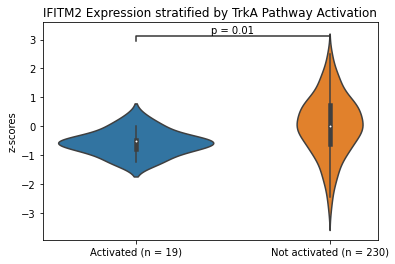

Activated: median = -0.4975, mean = -0.5628947368421053, 95% CI = (-0.7508591209268598, -0.3749303527573509)
Not activated: median = 0.0187, mean = 0.04650086956521741, 95% CI = (-0.0856199610413198, 0.1786217001717546)


In [29]:
#using z-score cutoff of 0.5 for activated pathway
activated_samples = []

for sample in z_scores.iloc[:,2:].columns:
    tp53_score = z_scores.loc[z_scores['Hugo_Symbol']=='TP53'][sample].values[0]
    ptpn6_score = z_scores.loc[z_scores['Hugo_Symbol']=='PTPN6'][sample].values[0]
    ntrk1_score = z_scores.loc[z_scores['Hugo_Symbol']=='NTRK1'][sample].values[0]
    if(tp53_score < -0.5 and ptpn6_score < -0.5 and ntrk1_score > 0.5):
        activated_samples.append(sample)

nonactivated_samples = list(set(z_scores.iloc[:,2:].columns) - set(activated_samples))

data = [activated_samples,nonactivated_samples]
compareExpression2('IFITM2',data,'TrkA Pathway Activation',['Activated',"Not activated"],'t-test_ind')

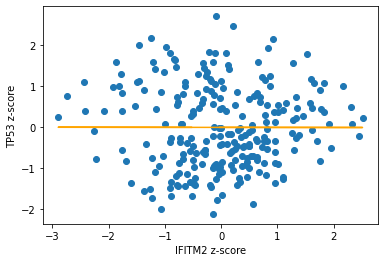

Pearson correlation coefficient = -0.0009986383662844572
p-value = 0.9874905120854743


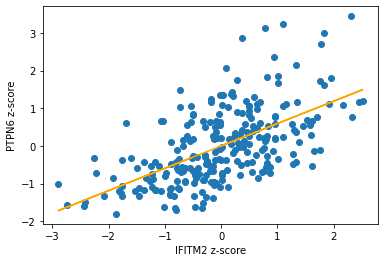

Pearson correlation coefficient = 0.5939113656640126
p-value = 3.9562523204866115e-25


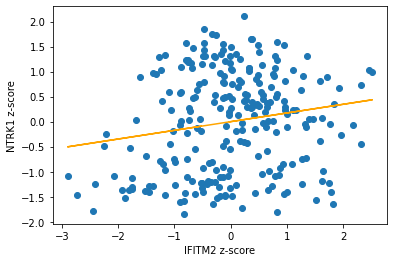

Pearson correlation coefficient = 0.17365602055050783
p-value = 0.006007668972399104


In [12]:
#TP53
geneScatter('IFITM2','TP53')

#PTPN6
geneScatter('IFITM2','PTPN6')

#NTRK1
geneScatter('IFITM2','NTRK1')

# Diagnosis Age Analysis

<18mo v.s. >=18mo: t-test independent samples, P_val=2.923e-01 stat=-1.055e+00


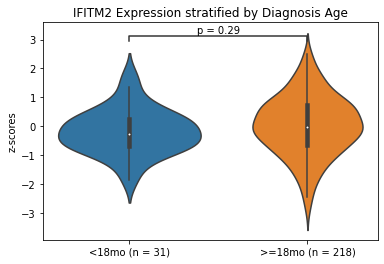

<18mo: median = -0.2599, mean = -0.17768387096774194, 95% CI = (-0.44821690736378383, 0.09284916542829999)
>=18mo: median = -0.01175, mean = 0.0252678899082569, 95% CI = (-0.11144458777685162, 0.16198036759336543)


In [13]:
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months
compareExpression2('IFITM2', Age_groups,'Diagnosis Age',['<18mo','>=18mo'],'t-test_ind')

# Tumor Sample Histology Analysis

Unfavorable v.s. Favorable: t-test independent samples, P_val=6.796e-01 stat=4.136e-01


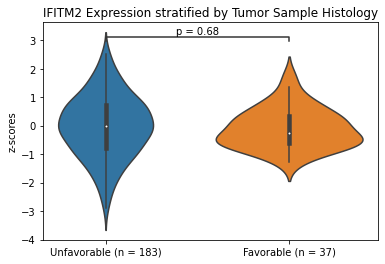

Unfavorable: median = -0.0246, mean = -0.017643169398907102, 95% CI = (-0.1750514742186725, 0.13976513542085833)
Favorable: median = -0.2599, mean = -0.09455135135135131, 95% CI = (-0.31728932048164105, 0.1281866177789384)


In [14]:
histology_groups = stratifyCategoricalPatientData('Tumor Sample Histology','Unfavorable','Favorable')
compareExpression2('IFITM2',[histology_groups[0],histology_groups[1]],'Tumor Sample Histology',['Unfavorable','Favorable'], 't-test_ind')




# Neoplasm Histologic Grade Analysis

Undifferentiated v.s. Differentiating: t-test independent samples, P_val=7.096e-01 stat=-3.730e-01


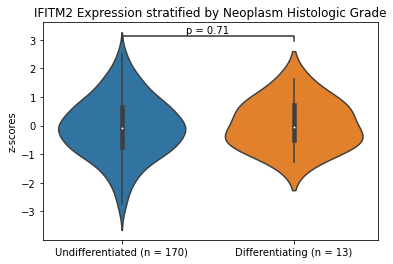

Undifferentiated: median = -0.0966, mean = -0.06950352941176469, 95% CI = (-0.22705524993027845, 0.08804819110674908)
Differentiating: median = -0.034, mean = 0.04156153846153846, 95% CI = (-0.4058335256584073, 0.48895660258148427)


In [15]:
histologic_grade_groups = stratifyCategoricalSampleData('Neoplasm Histologic Grade','Undifferentiated or Poorly Differentiated','Differentiating')
compareExpression2('IFITM2',[histologic_grade_groups[0],histologic_grade_groups[1]],'Neoplasm Histologic Grade',['Undifferentiated','Differentiating'], 't-test_ind')




# Repeat analysis above for samples without MYCN amplification

In [16]:
#Stratify samples based on MYCN amplification
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')

#Find z-scores for MYCN nonamplified samples
nonamplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[0]).intersection(z_scores.columns))
nonamplified_MYCN_z_scores = z_scores[nonamplified_MYCN_columns]



### EFS Analysis

Low IFITM2 v.s. High IFITM2: t-test independent samples, P_val=1.105e-01 stat=1.610e+00


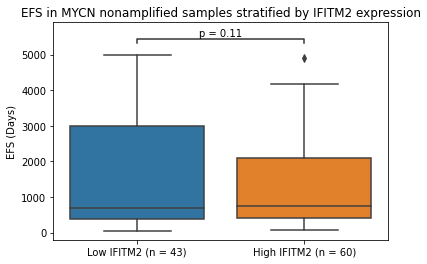

Low IFITM2: median = 693.0, mean = 1748.0232558139535, 95% CI = (1258.7675417876762, 2237.2789698402307)
High IFITM2: median = 750.0, mean = 1303.8333333333333, 95% CI = (1009.2619014438765, 1598.40476522279)


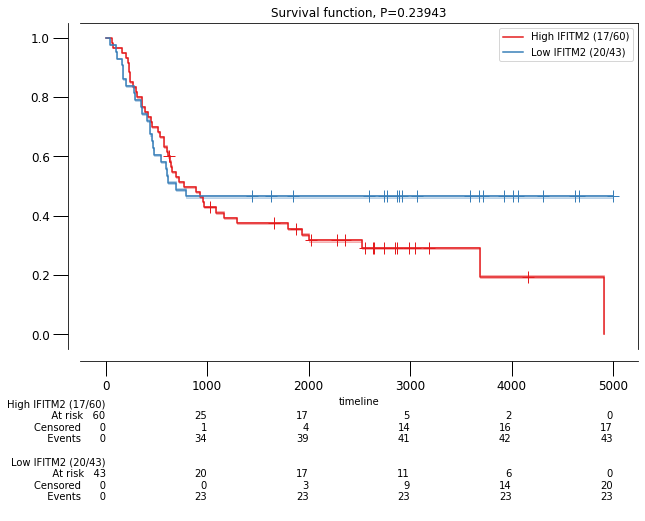

In [17]:
IFITM2_groups = stratifyDataOnGeneExpression('IFITM2',-0.5,0.5,z_scores=nonamplified_MYCN_z_scores)
compareEFS2(IFITM2_groups, 'EFS in MYCN nonamplified samples stratified by IFITM2 expression', ['Low IFITM2','High IFITM2'], 't-test_ind')
kaplanmeierEFS(IFITM2_groups,'Low IFITM2','High IFITM2')



### MYCN Analysis

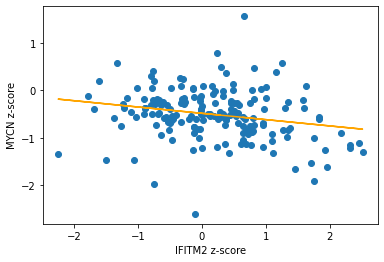

Pearson correlation coefficient = -0.22391455125786072
p-value = 0.0028937937911426245


In [18]:
geneScatter('IFITM2','MYCN',z_scores=nonamplified_MYCN_z_scores)

### SCA Analysis

No Loss v.s. Loss: t-test independent samples, P_val=8.943e-01 stat=-1.338e-01


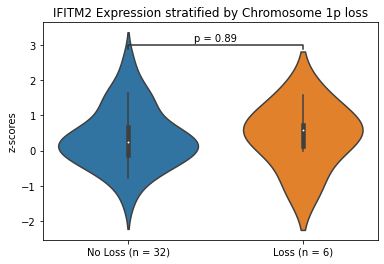

No Loss: median = 0.23120000000000002, mean = 0.36385625000000005, 95% CI = (0.071034299567304, 0.6566782004326961)
Loss: median = 0.5850500000000001, mean = 0.41440000000000005, 95% CI = (-0.28594313717174163, 1.1147431371717418)


In [19]:
#1p loss
ch1p_non_loss_samples = list(set(MYCN_groups[0]).intersection(set(ch1p_non_loss_samples)))
ch1p_loss_samples = list(set(MYCN_groups[0]).intersection(set(ch1p_loss_samples)))
compareExpression2('IFITM2',[ch1p_non_loss_samples,ch1p_loss_samples],'Chromosome 1p loss',['No Loss','Loss'],'t-test_ind')



No Loss v.s. Loss: t-test independent samples, P_val=4.193e-01 stat=8.170e-01


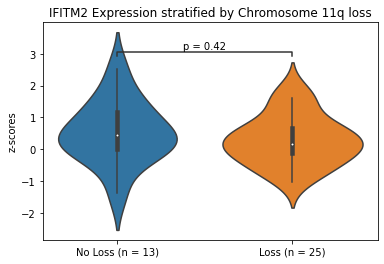

No Loss: median = 0.4582, mean = 0.5265538461538462, 95% CI = (-0.00011097297065876255, 1.053218665278351)
Loss: median = 0.1717, mean = 0.29138400000000003, 95% CI = (-0.010651013201570747, 0.5934190132015709)


In [20]:
#11q loss
ch11q_non_loss_samples = list(set(MYCN_groups[0]).intersection(set(ch11q_non_loss_samples)))
ch11q_loss_samples = list(set(MYCN_groups[0]).intersection(set(ch11q_loss_samples)))
compareExpression2('IFITM2',[ch11q_non_loss_samples,ch11q_loss_samples],'Chromosome 11q loss',['No Loss','Loss'],'t-test_ind')



No Gain v.s. Gain: t-test independent samples, P_val=1.811e-01 stat=1.364e+00


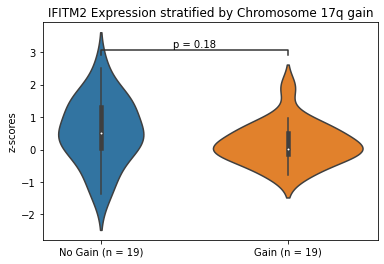

No Gain: median = 0.4942, mean = 0.555121052631579, 95% CI = (0.11061472143440793, 0.9996273838287499)
Gain: median = 0.0202, mean = 0.1885526315789474, 95% CI = (-0.0942104639079728, 0.47131572706586755)


In [21]:
#17q gain
ch17q_non_gain_samples = list(set(MYCN_groups[0]).intersection(set(ch17q_non_gain_samples)))
ch17q_gain_samples = list(set(MYCN_groups[0]).intersection(set(ch17q_gain_samples)))
compareExpression2('IFITM2',[ch17q_non_gain_samples,ch17q_gain_samples],'Chromosome 17q gain',['No Gain','Gain'],'t-test_ind')




No SCA v.s. SCA: t-test independent samples, P_val=5.652e-01 stat=5.805e-01


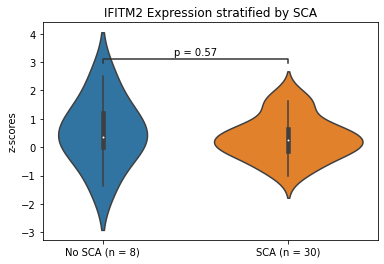

No SCA: median = 0.37445, mean = 0.5260374999999999, 95% CI = (-0.2833824166557478, 1.3354574166557476)
SCA: median = 0.24924999999999997, mean = 0.3307166666666667, 95% CI = (0.06331506030425588, 0.5981182730290775)


In [22]:
#All three SCAs
non_sca_samples = list(set(MYCN_groups[0]).intersection(set(non_sca_samples)))
sca_samples = list(set(MYCN_groups[0]).intersection(set(sca_samples)))
compareExpression2('IFITM2',[non_sca_samples,sca_samples],'SCA',['No SCA','SCA'],'t-test_ind')

### TP53/PTPN6/NTRK1 Analysis

Activated v.s. Not activated: t-test independent samples, P_val=1.309e-04 stat=-3.913e+00


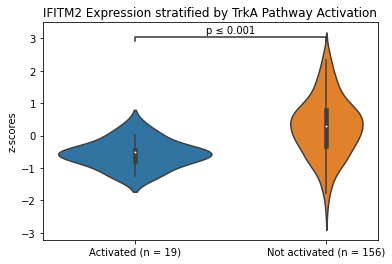

Activated: median = -0.4975, mean = -0.5628947368421053, 95% CI = (-0.7508591209268598, -0.3749303527573509)
Not activated: median = 0.28464999999999996, mean = 0.2646807692307692, 95% CI = (0.12211829658564077, 0.40724324187589767)


In [23]:
#using z-score cutoff of 0.5 for activated pathway
activated_samples = []

for sample in z_scores.iloc[:,2:].columns:
    tp53_score = z_scores.loc[z_scores['Hugo_Symbol']=='TP53'][sample].values[0]
    ptpn6_score = z_scores.loc[z_scores['Hugo_Symbol']=='PTPN6'][sample].values[0]
    ntrk1_score = z_scores.loc[z_scores['Hugo_Symbol']=='NTRK1'][sample].values[0]
    if(tp53_score < -0.5 and ptpn6_score < -0.5 and ntrk1_score > 0.5):
        activated_samples.append(sample)

nonactivated_samples = list(set(z_scores.iloc[:,2:].columns) - set(activated_samples))

activated_samples = list(set(MYCN_groups[0]).intersection(set(activated_samples)))
nonactivated_samples = list(set(MYCN_groups[0]).intersection(set(nonactivated_samples)))

data = [activated_samples,nonactivated_samples]
compareExpression2('IFITM2',data,'TrkA Pathway Activation',['Activated',"Not activated"],'t-test_ind')

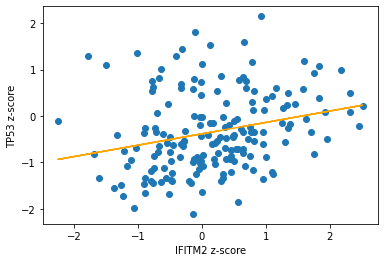

Pearson correlation coefficient = 0.26120126475523414
p-value = 0.00048046706281320905


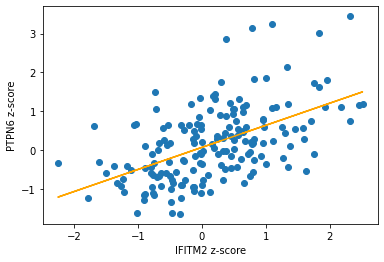

Pearson correlation coefficient = 0.5368480508186662
p-value = 1.884373229539667e-14


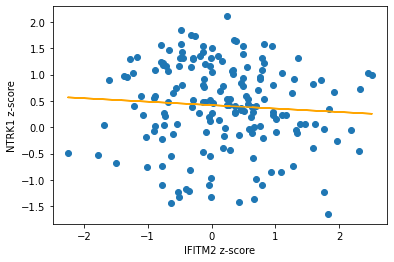

Pearson correlation coefficient = -0.0726396187709665
p-value = 0.33942192442831437


In [24]:
#TP53
geneScatter('IFITM2','TP53',z_scores=nonamplified_MYCN_z_scores)

#PTPN6
geneScatter('IFITM2','PTPN6',z_scores=nonamplified_MYCN_z_scores)

#NTRK1
geneScatter('IFITM2','NTRK1',z_scores=nonamplified_MYCN_z_scores)

### Diagnosis Age Analysis

<18mo v.s. >=18mo: t-test independent samples, P_val=1.036e-01 stat=-1.636e+00


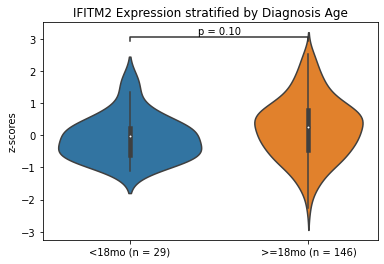

<18mo: median = -0.034, mean = -0.07525862068965518, 95% CI = (-0.32242495387712056, 0.17190771249781023)
>=18mo: median = 0.26295, mean = 0.224504794520548, 95% CI = (0.07234790717131193, 0.3766616818697841)


In [25]:
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months
Age_groups[0] = list(set(MYCN_groups[0]).intersection(set(Age_groups[0])))
Age_groups[1] = list(set(MYCN_groups[0]).intersection(set(Age_groups[1])))
compareExpression2('IFITM2', Age_groups,'Diagnosis Age',['<18mo','>=18mo'],'t-test_ind')

### Tumor Sample Histology Analysis

Unfavorable v.s. Favorable: t-test independent samples, P_val=4.388e-02 stat=2.032e+00


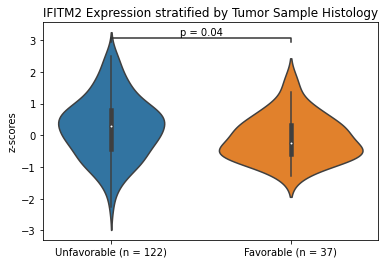

Unfavorable: median = 0.2905, mean = 0.25044672131147544, 95% CI = (0.080237627931151, 0.4206558146917999)
Favorable: median = -0.2599, mean = -0.09455135135135131, 95% CI = (-0.31728932048164105, 0.1281866177789384)


In [26]:
histology_groups = stratifyCategoricalPatientData('Tumor Sample Histology','Unfavorable','Favorable')
histology_groups[0] = list(set(MYCN_groups[0]).intersection(set(histology_groups[0])))
histology_groups[1] = list(set(MYCN_groups[0]).intersection(set(histology_groups[1])))
compareExpression2('IFITM2',[histology_groups[0],histology_groups[1]],'Tumor Sample Histology',['Unfavorable','Favorable'], 't-test_ind')




### Neoplasm Histologic Grade Analysis

Undifferentiated v.s. Differentiating: t-test independent samples, P_val=6.170e-01 stat=5.014e-01


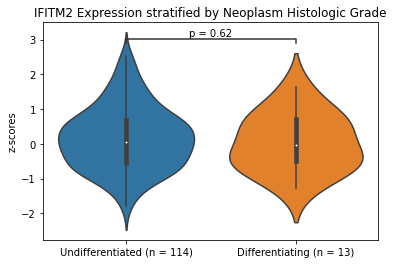

Undifferentiated: median = 0.059649999999999995, mean = 0.17223421052631577, 95% CI = (0.007538870369011075, 0.33692955068362046)
Differentiating: median = -0.034, mean = 0.04156153846153846, 95% CI = (-0.4058335256584073, 0.48895660258148427)


In [27]:
histologic_grade_groups = stratifyCategoricalSampleData('Neoplasm Histologic Grade','Undifferentiated or Poorly Differentiated','Differentiating')
histologic_grade_groups[0] = list(set(MYCN_groups[0]).intersection(set(histologic_grade_groups[0])))
histologic_grade_groups[1] = list(set(MYCN_groups[0]).intersection(set(histologic_grade_groups[1])))
compareExpression2('IFITM2',[histologic_grade_groups[0],histologic_grade_groups[1]],'Neoplasm Histologic Grade',['Undifferentiated','Differentiating'], 't-test_ind')


